# Analysis notebook for daily odd changes

In [3]:
import pandas as pd

# Load the CSV file (ensure the file is in your working directory or provide the full path)
df = pd.read_csv("daily_NBA_odds.csv")

# Define the columns we want to keep
cols_to_keep = [
    "GameId",
    "Day",
    "HomeTeamName",
    "AwayTeamName",
    "GameOddId",
    "Sportsbook",
    "Created",
    "HomeMoneyLine",
    "AwayMoneyLine"
]

# Create a new DataFrame with only the selected columns
df_filtered = df[cols_to_keep]

def moneyline_to_probability(odds):
    # Convert to float in case odds are stored as strings
    odds = float(odds)
    if odds > 0:
        # For positive odds, implied probability = 100 / (odds + 100)
        return 100 / (odds + 100)
    else:
        # For negative odds, implied probability = -odds / (-odds + 100)
        return -odds / (-odds + 100)


df_filtered = df_filtered.copy()  # Make an explicit copy
df_filtered["ImpliedProbabilityHome"] = df_filtered["HomeMoneyLine"].apply(moneyline_to_probability)
df_filtered["ImpliedProbabilityAway"] = df_filtered["AwayMoneyLine"].apply(moneyline_to_probability)


# Display the first few rows to check the new columns
df_filtered.head()


,GameId,Day,HomeTeamName,AwayTeamName,GameOddId,Sportsbook,Created,HomeMoneyLine,AwayMoneyLine,ImpliedProbabilityHome,ImpliedProbabilityAway
0,20889,2024-05-05,CLE,ORL,22199010,FanDuel,2024-05-03 21:38:49,-198.0,166.0,0.664430,0.375940
1,20889,2024-05-05,CLE,ORL,22199050,DraftKings,2024-05-03 21:47:49,-198.0,164.0,0.664430,0.378788
2,20889,2024-05-05,CLE,ORL,22199077,FanDuel,2024-05-03 21:50:09,-172.0,144.0,0.632353,0.409836
3,20889,2024-05-05,CLE,ORL,22199103,FanDuel,2024-05-03 21:50:59,-162.0,136.0,0.618321,0.423729
4,20889,2024-05-05,CLE,ORL,22199113,FanDuel,2024-05-03 21:51:19,-162.0,136.0,0.618321,0.423729


In [12]:
# Create a separate DataFrame for each unique sportsbook
unique_sportsbooks = df_filtered["Sportsbook"].unique()
sportsbook_dfs = {}

for sb in unique_sportsbooks:
    sportsbook_dfs[sb] = df_filtered[df_filtered["Sportsbook"] == sb].copy()

# Now you can access each sportsbook's data by its name, for example:
# df_draftkings = sportsbook_dfs["DraftKings"]
# df_fanduel = sportsbook_dfs["FanDuel"]

DraftKingsDf = sportsbook_dfs["DraftKings"]
print(len(DraftKingsDf['GameId'].unique()))
DraftKingsDf.head()



7


,GameId,Day,HomeTeamName,AwayTeamName,GameOddId,Sportsbook,Created,HomeMoneyLine,AwayMoneyLine,ImpliedProbabilityHome,ImpliedProbabilityAway
1,20889,2024-05-05,CLE,ORL,22199050,DraftKings,2024-05-03 21:47:49,-198.0,164.0,0.66443,0.378788
5,20889,2024-05-05,CLE,ORL,22199123,DraftKings,2024-05-03 21:51:29,-166.0,140.0,0.62406,0.416667
29,20889,2024-05-05,CLE,ORL,22199409,DraftKings,2024-05-03 22:03:28,-198.0,140.0,0.66443,0.416667
30,20889,2024-05-05,CLE,ORL,22199444,DraftKings,2024-05-03 22:04:28,-166.0,140.0,0.62406,0.416667
44,20889,2024-05-05,CLE,ORL,22200098,DraftKings,2024-05-03 22:34:18,-198.0,140.0,0.66443,0.416667


In [15]:
draftkings_game_ids = DraftKingsDf["GameId"].unique()

# 3. Create a dictionary of DataFrames, one for each GameId
draftkings_game_timeseries = {}

for gid in draftkings_game_ids:
    # Filter for one specific game
    df_game = DraftKingsDf[DraftKingsDf["GameId"] == gid].copy()
    
    # Optionally, sort by Created again if needed
    df_game.sort_values(by="Created", inplace=True)
    
    # Now df_game is a time series of implied probabilities for the home & away teams
    # You can store it in a dictionary for later use
    draftkings_game_timeseries[gid] = df_game

# Example usage:
# Let's pick one game ID and look at the first few rows of its time series
sample_gid = draftkings_game_ids[4]
print(f"Time series for GameId = {sample_gid}")
print(draftkings_game_timeseries[sample_gid][["Created", 
                                              "ImpliedProbabilityHome", 
                                              "ImpliedProbabilityAway"]].head())

Time series for GameId = 20921
                  Created  ImpliedProbabilityHome  ImpliedProbabilityAway
5079  2024-05-06 22:00:55                0.696970                0.344828
5083  2024-05-06 22:08:55                0.696970                0.344828
5094  2024-05-06 22:15:56                0.685535                0.357143
5129  2024-05-06 22:25:15                0.672131                0.370370
5131  2024-05-06 22:26:05                0.672131                0.370370


In [19]:
print(draftkings_game_timeseries.keys())

dict_keys([20889, 20913, 20914, 20915, 20921, 20930, 20931])


GameId: 20930
Home Probability Mean: 0.6174, Variance: 0.0000
Away Probability Mean: 0.4247, Variance: 0.0000


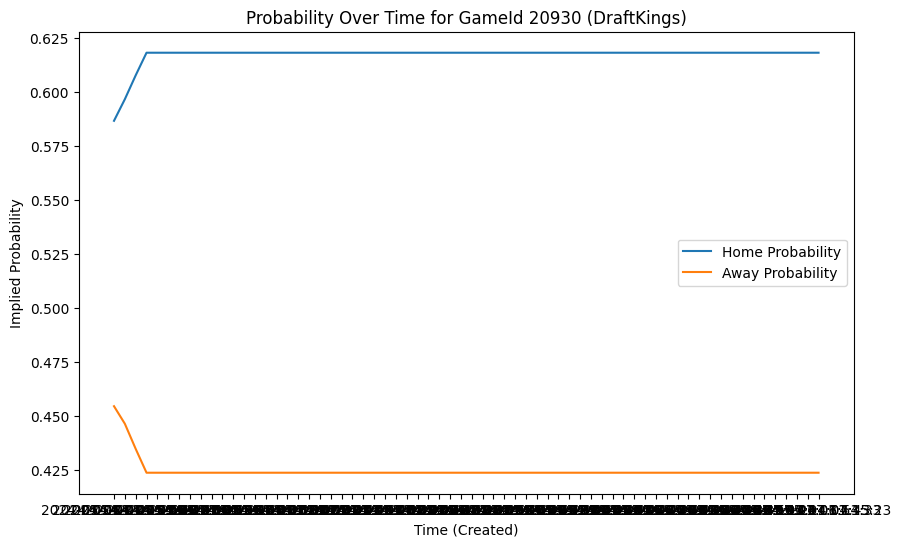

In [27]:
### Game 20889 CLE vs ORL

sample_game_id = 20930

df_game = draftkings_game_timeseries[sample_game_id]


home_mean = df_game["ImpliedProbabilityHome"].mean()
home_var = df_game["ImpliedProbabilityHome"].var()

away_mean = df_game["ImpliedProbabilityAway"].mean()
away_var = df_game["ImpliedProbabilityAway"].var()

print(f"GameId: {sample_game_id}")
print(f"Home Probability Mean: {home_mean:.4f}, Variance: {home_var:.4f}")
print(f"Away Probability Mean: {away_mean:.4f}, Variance: {away_var:.4f}")

# Plot both probability vectors over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_game["Created"], df_game["ImpliedProbabilityHome"], label="Home Probability")
plt.plot(df_game["Created"], df_game["ImpliedProbabilityAway"], label="Away Probability")

plt.xlabel("Time (Created)")
plt.ylabel("Implied Probability")
plt.title(f"Probability Over Time for GameId {sample_game_id} (DraftKings)")
plt.legend()
plt.show()


In [28]:
print(df_game['ImpliedProbabilityHome'])
print(df_game['Created'])

6054    0.586777
6096    0.596774
6162    0.607843
6214    0.618321
6419    0.618321
          ...   
6775    0.618321
6776    0.618321
6777    0.618321
6785    0.618321
6787    0.618321
Name: ImpliedProbabilityHome, Length: 66, dtype: float64
6054    2024-05-04 01:15:59
6096    2024-05-04 04:12:48
6162    2024-05-04 15:51:22
6214    2024-05-05 04:59:19
6419    2024-05-05 19:31:55
               ...         
6775    2024-05-07 11:04:04
6776    2024-05-07 11:06:53
6777    2024-05-07 11:07:43
6785    2024-05-07 11:14:33
6787    2024-05-07 11:15:23
Name: Created, Length: 66, dtype: object
